In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T


,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,1.639066,NaN,NaN
1,-1.736814,NaN,NaN
2,-0.181172,NaN,2.057138
3,0.731113,NaN,-0.045768
4,0.865095,-0.684976,1.416861
5,-0.582103,0.479018,0.050184
6,-1.467321,-0.784790,1.233059


In [16]:
df.fillna(0)

,0,1,2
0,1.639066,0.000000,0.000000
1,-1.736814,0.000000,0.000000
2,-0.181172,0.000000,2.057138
3,0.731113,0.000000,-0.045768
4,0.865095,-0.684976,1.416861
5,-0.582103,0.479018,0.050184
6,-1.467321,-0.784790,1.233059


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.639066,0.500000,0.000000
1,-1.736814,0.500000,0.000000
2,-0.181172,0.500000,2.057138
3,0.731113,0.500000,-0.045768
4,0.865095,-0.684976,1.416861
5,-0.582103,0.479018,0.050184
6,-1.467321,-0.784790,1.233059


In [18]:
df.fillna(method="bfill")

,0,1,2
0,1.639066,-0.684976,2.057138
1,-1.736814,-0.684976,2.057138
2,-0.181172,-0.684976,2.057138
3,0.731113,-0.684976,-0.045768
4,0.865095,-0.684976,1.416861
5,-0.582103,0.479018,0.050184
6,-1.467321,-0.784790,1.233059


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,1.639066,NaN,2.057138
1,-1.736814,NaN,2.057138
2,-0.181172,-0.684976,2.057138
3,0.731113,-0.684976,-0.045768
4,0.865095,-0.684976,1.416861
5,-0.582103,0.479018,0.050184
6,-1.467321,-0.784790,1.233059


In [20]:
df.fillna(data.mean())

,0,1,2
0,1.639066,6.500000,3.000000
1,-1.736814,6.500000,3.000000
2,-0.181172,6.500000,2.057138
3,0.731113,6.500000,-0.045768
4,0.865095,-0.684976,1.416861
5,-0.582103,0.479018,0.050184
6,-1.467321,-0.784790,1.233059


In [21]:
df.fillna(data.median())

,0,1,2
0,1.639066,6.500000,3.000000
1,-1.736814,6.500000,3.000000
2,-0.181172,6.500000,2.057138
3,0.731113,6.500000,-0.045768
4,0.865095,-0.684976,1.416861
5,-0.582103,0.479018,0.050184
6,-1.467321,-0.784790,1.233059


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

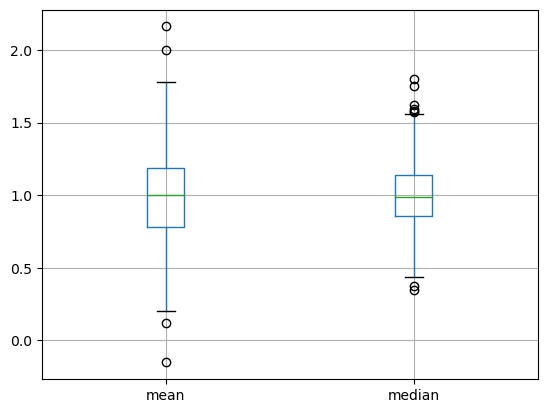

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,1.639066,NaN,NaN,1
1,-1.736814,NaN,NaN,1
2,-0.181172,NaN,2.057138,0
3,0.731113,NaN,-0.045768,0
4,0.865095,-0.684976,1.416861,0
5,-0.582103,0.479018,0.050184,0
6,-1.467321,-0.784790,1.233059,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

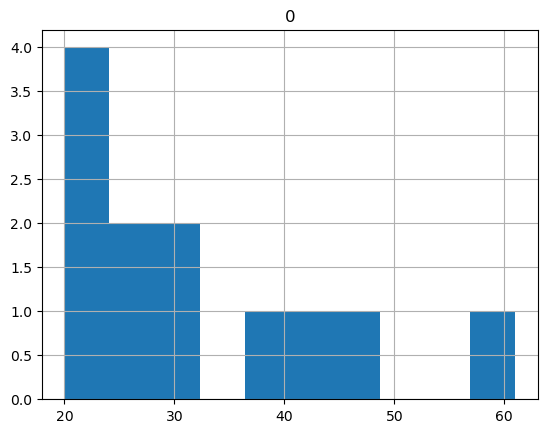

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

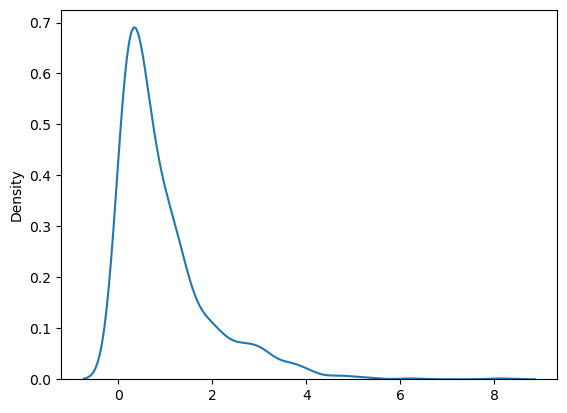

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

In [122]:
data

array([9.14796680e-01, 3.87398124e-01, 1.31013439e+00, 2.63202912e+00,
       3.94280876e-02, 9.78007339e-01, 4.05371665e-01, 1.44344661e+00,
       1.78758066e-01, 2.25129233e-01, 5.29966057e+00, 2.27182030e+00,
       1.39005765e-01, 6.27960213e-02, 3.99847112e+00, 2.56982913e-01,
       4.29522097e-01, 2.05662227e-01, 1.26620416e+00, 1.72287947e+00,
       5.56264985e-01, 1.04523661e-01, 8.26695298e-01, 9.63458715e-01,
       1.93588403e+00, 5.17012004e-01, 2.40264300e-01, 1.88868809e-01,
       9.61329425e-01, 7.72173215e-01, 3.68159897e-01, 7.37446132e-01,
       4.38536392e-01, 3.49779477e-01, 3.09243696e+00, 2.04682325e-01,
       5.25636382e-01, 1.32755539e+00, 2.78788161e+00, 4.86898258e-01,
       2.12808468e+00, 1.25312811e+00, 1.45647568e+00, 6.83921037e-01,
       4.28060683e-01, 2.96289033e-02, 4.28829749e-01, 4.16183512e-01,
       2.53020542e-01, 1.48270734e+00, 3.55810458e-01, 1.82051413e-01,
       1.28077157e-01, 1.13105877e+00, 1.38304166e+00, 1.73630582e-01,
      

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

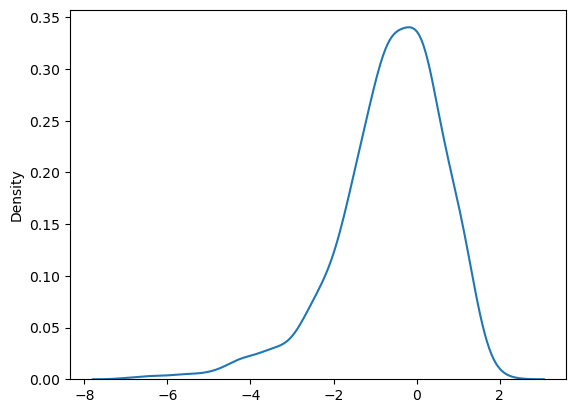

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

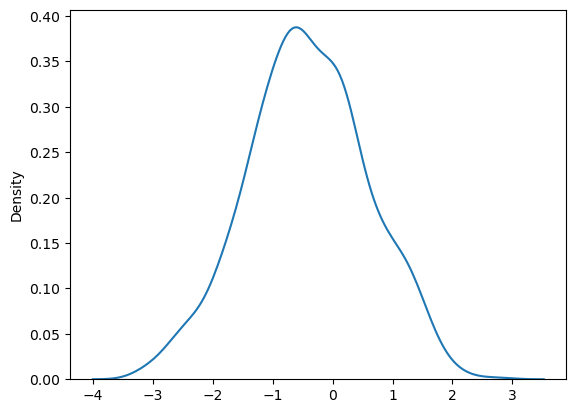

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.25358031693141087

# Домашнее задание

In [1260]:
#df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
df = pd.read_csv("techparams_train.csv")

In [1261]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [1262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [1263]:
df.describe()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
count,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,...,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000
mean,30663.219933,4.273511,-0.875116,30684.557267,8.970296,4.290234,0.628512,4.576506,3.756481,1999.358377,...,3.049370,1.867014,12.964828,53.300937,1790.357267,18.434177,2.991421,0.002035,4.474783,2660.826246
std,17666.118635,2.929769,2.904357,17562.733960,6.148230,4.765435,1.230331,1.161683,1.720373,13.433605,...,1.375937,0.350225,4.499009,24.845687,616.347148,9.541600,0.142150,0.045065,39.934808,236.315583
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1904.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1190.000000
25%,15455.000000,3.000000,-1.000000,15578.000000,8.500000,-1.000000,0.000000,4.000000,4.000000,1991.000000,...,1.000000,2.000000,13.000000,46.000000,1992.000000,10.000000,3.000000,0.000000,1.000000,2510.000000
50%,30632.000000,3.000000,-1.000000,30756.000000,9.800000,5.400000,0.000000,4.000000,4.000000,2001.000000,...,4.000000,2.000000,13.000000,58.000000,2002.000000,16.000000,3.000000,0.000000,1.000000,2640.000000
75%,45951.000000,8.000000,-1.000000,45793.000000,10.800000,8.000000,0.000000,6.000000,5.000000,2010.000000,...,4.000000,2.000000,13.000000,68.000000,2011.000000,26.000000,3.000000,0.000000,1.000000,2774.000000
max,61228.000000,10.000000,200.000000,61175.000000,23.500000,40.000000,6.000000,10.000000,8.000000,2021.000000,...,4.000000,2.000000,35.000000,166.000000,2021.000000,36.000000,3.000000,1.000000,658.000000,5885.000000


In [1264]:
#построим матрицу коррреляции для отбора факторов в модель
df.corr().sort_values(by='target')

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
back-suspension,0.003898,1.000000,0.008851,-0.193989,-0.105450,-0.137078,-0.119261,-0.160858,0.061687,-0.029760,...,-0.102584,-0.031057,-0.042323,-0.323143,-0.021228,-0.116755,-0.019685,-0.016126,0.043355,-0.159912
engine-stop,0.000014,-0.026592,-0.103095,-0.033840,0.008496,-0.060000,0.007639,0.084740,0.027275,-0.383053,...,-0.165635,0.073022,-0.072257,-0.008340,0.942911,0.010484,0.004332,-0.062556,-0.096968,-0.137719
supergen_year-stop,0.000074,-0.021228,-0.102719,-0.032347,0.005798,-0.064671,0.008260,0.085953,0.031153,-0.399186,...,-0.169965,0.079660,-0.065341,-0.010820,1.000000,0.012530,0.005852,-0.059193,-0.090634,-0.136986
engine-type,-0.001997,0.023575,-0.013112,0.025986,-0.423809,0.027914,0.161144,0.132648,-0.472376,-0.195802,...,-0.114983,0.113149,-0.152197,-0.109428,0.068168,0.119582,-0.026761,-0.070262,0.002693,-0.125304
valves,0.006258,0.132197,0.124941,-0.109030,-0.310940,-0.196455,0.026420,-0.026653,0.191078,-0.240955,...,-0.183620,0.079333,-0.055996,-0.307176,0.029097,-0.014721,0.010498,-0.010437,-0.000155,-0.066402
models_group,0.006834,-0.019685,0.002595,-0.027029,0.000219,-0.033141,-0.023909,-0.044688,0.012638,-0.026436,...,-0.027156,0.008204,-0.000870,-0.014715,0.005852,-0.027039,1.000000,0.002725,0.005308,-0.031663
configurations_safety-rating,-0.004249,-0.031057,-0.008994,-0.012119,-0.111495,-0.080412,0.102481,0.125640,-0.057243,-0.229782,...,-0.147086,1.000000,-0.027756,-0.052872,0.079660,0.048447,0.008204,0.011286,0.005593,-0.007558
index,1.000000,0.003898,-0.001457,-0.005556,-0.000464,-0.000202,-0.002258,-0.001537,0.001591,-0.000337,...,0.004611,-0.004249,0.000466,-0.001526,0.000074,-0.006934,0.006834,0.005661,-0.001654,0.002701
models_male,-0.001654,0.043355,0.024069,-0.030769,-0.003346,-0.014838,0.000143,-0.017780,-0.026445,0.028909,...,0.021991,0.005593,0.015235,-0.026393,-0.090634,0.042168,0.005308,-0.003929,1.000000,0.003423
engine-feeding,0.001591,0.061687,0.065207,-0.007057,0.167183,-0.004348,-0.074468,-0.101289,1.000000,0.232445,...,0.127065,-0.057243,0.076379,0.042067,0.031153,-0.110842,0.012638,0.026376,-0.026445,0.012235


оставим cylinders-value, weight, configurations_tank-volume и попробуем еще configurations_seats (если что исключим)

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

<AxesSubplot:xlabel='cylinders-value', ylabel='Density'>

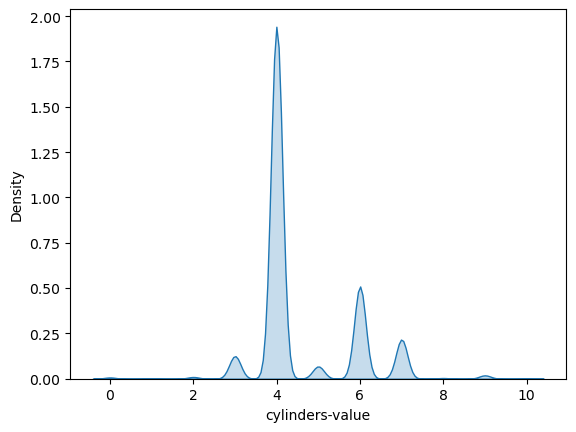

In [1265]:
#проверим распределение признаков
sns.kdeplot(data=df, x='cylinders-value', fill=True)

<AxesSubplot:xlabel='weight', ylabel='Density'>

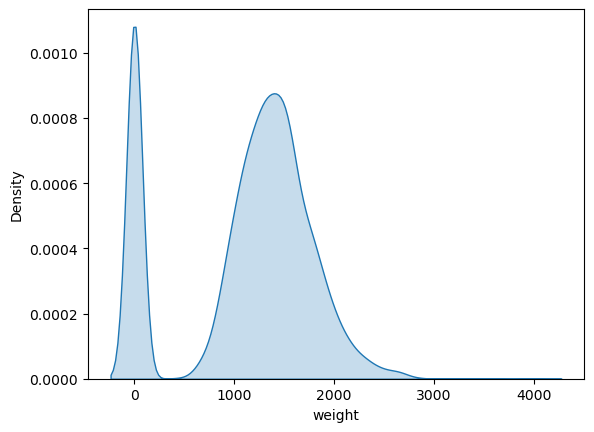

In [1266]:
sns.kdeplot(data=df, x='weight', fill=True)

<AxesSubplot:xlabel='configurations_tank-volume', ylabel='Density'>

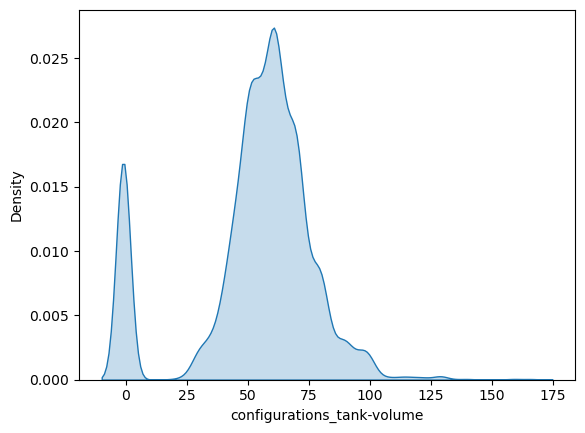

In [1267]:
sns.kdeplot(data=df, x='configurations_tank-volume', fill=True)

<AxesSubplot:xlabel='configurations_seats', ylabel='Density'>

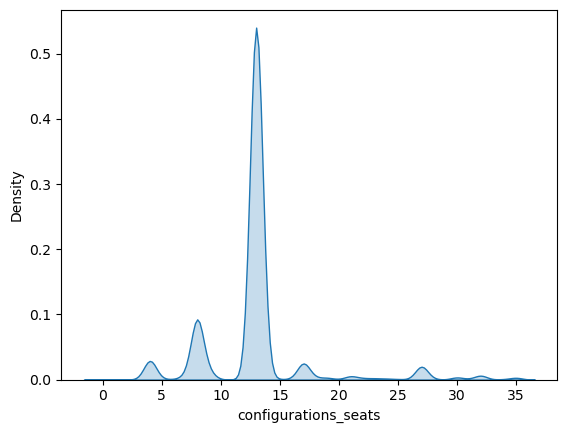

In [1268]:
sns.kdeplot(data=df, x='configurations_seats', fill=True)

есть смысл оставить в модели weight и сonfigurations_tank-volume, остальные признаки распределены слишком не нормально

Поработаем с выбросами и нормализацией

187

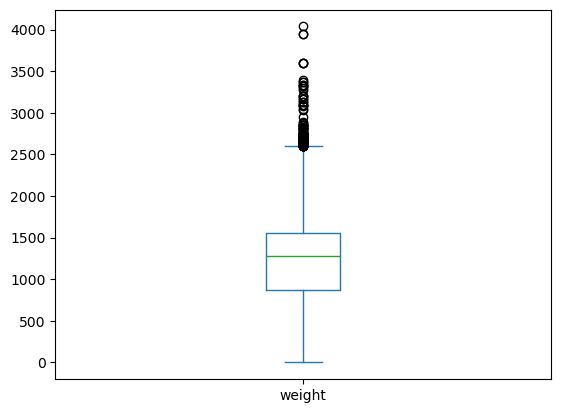

In [1269]:
df['weight'].plot.box()
stat = df.describe()
q3 = stat['weight']['75%']
q1 = stat['weight']['25%']
iqr = q3-q1
iqr_min = q1 - 1.5 * iqr
iqr_max = q3 + 1.5 * iqr
df.loc[df['weight'] > iqr_max].shape[0]

In [1320]:
q3_t = stat['target']['75%']
q1_t = stat['target']['25%']
iqr_t = q3_t-q1_t
iqr_min_t = q1_t - 1.5 * iqr_t
iqr_max_t = q3_t + 1.5 * iqr_t
df.loc[df['target'] < iqr_min_t].shape[0]

303

Удалим выбросы сверху по весу, так как в масштабах датафрейма их очень мало

In [1321]:
df = df.loc[df['weight'] <= iqr_max]
df = df.loc[df['target'] <= iqr_max_t]
df = df.loc[df['target'] >= iqr_min_t]
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


проверим данные на аномальность

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


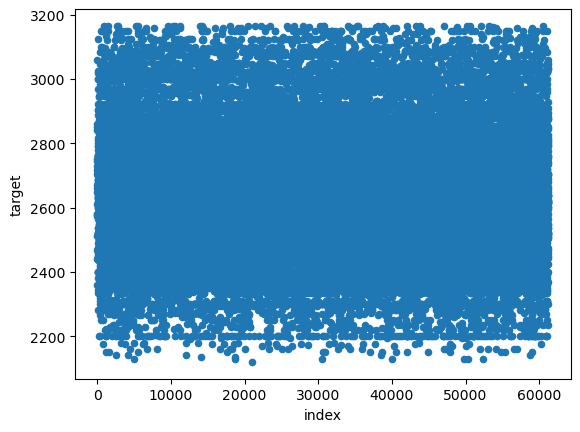

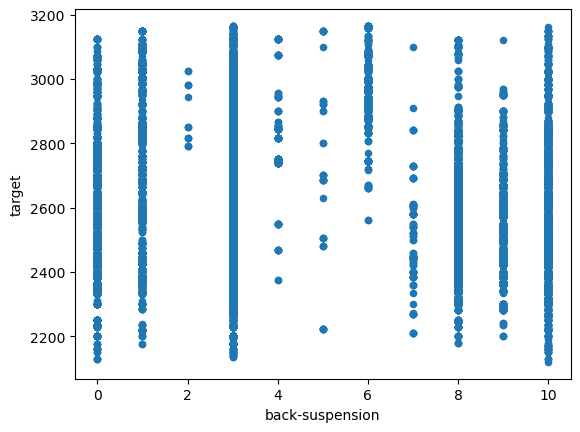

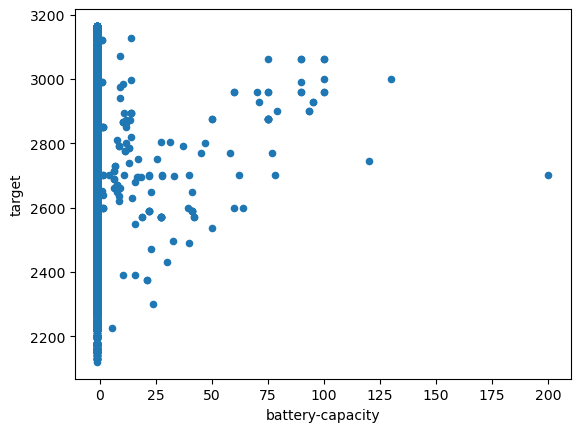

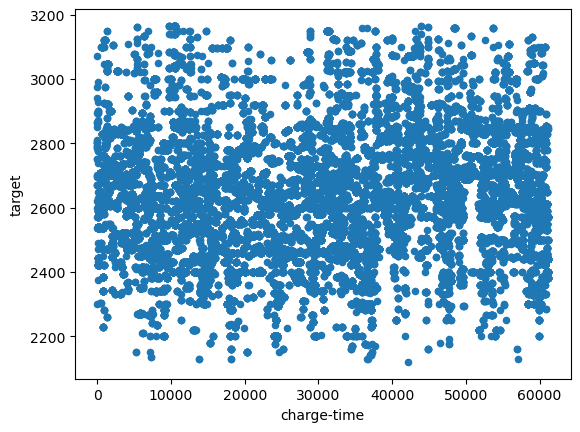

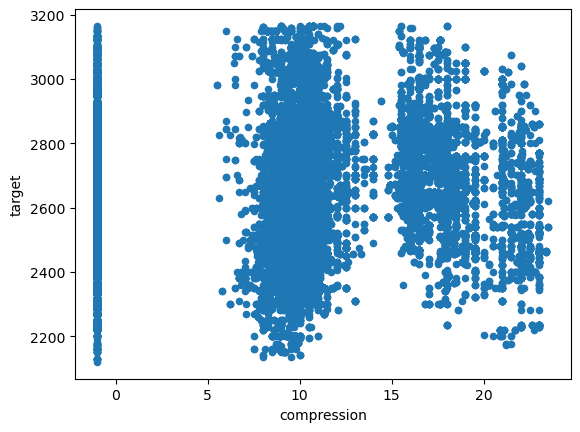

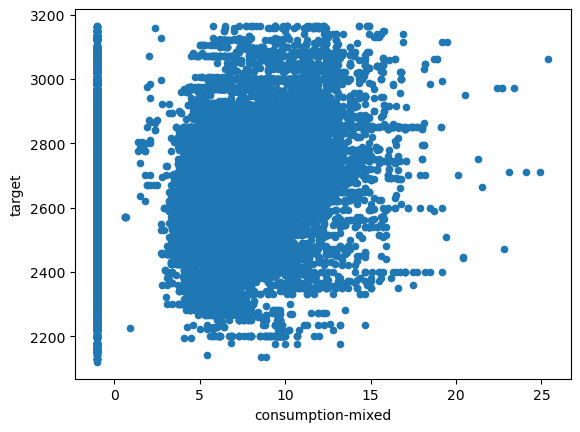

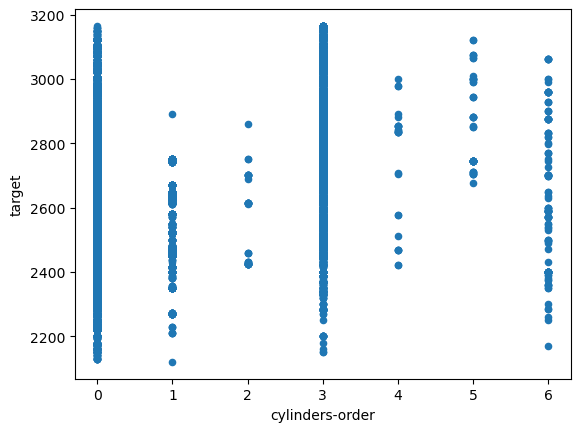

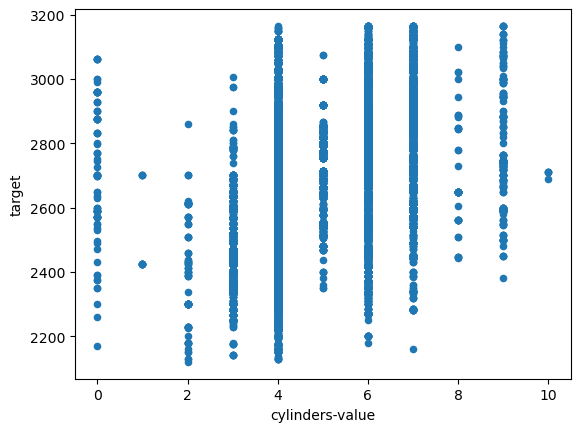

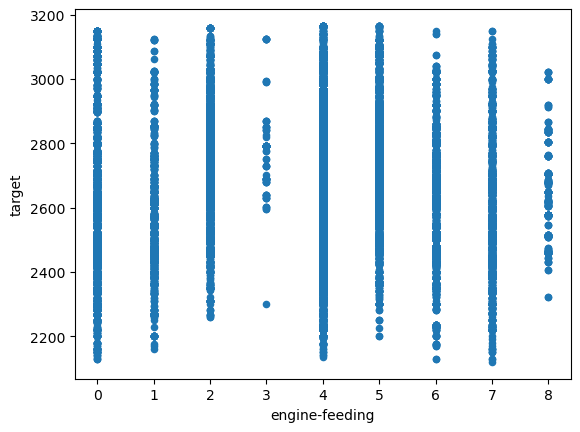

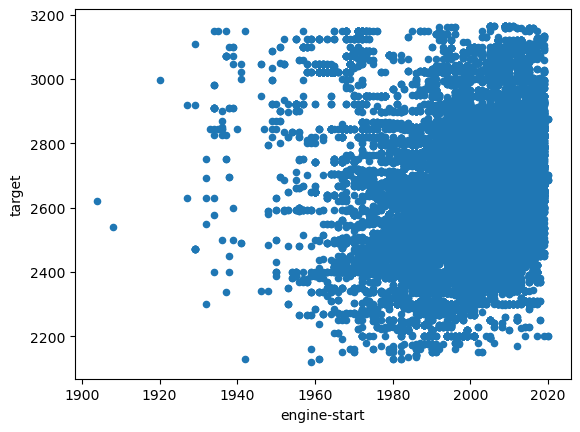

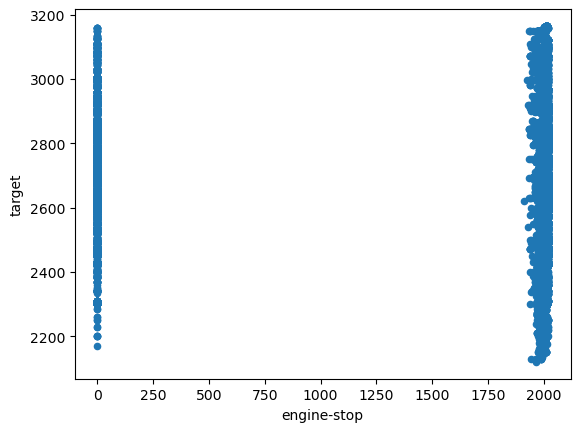

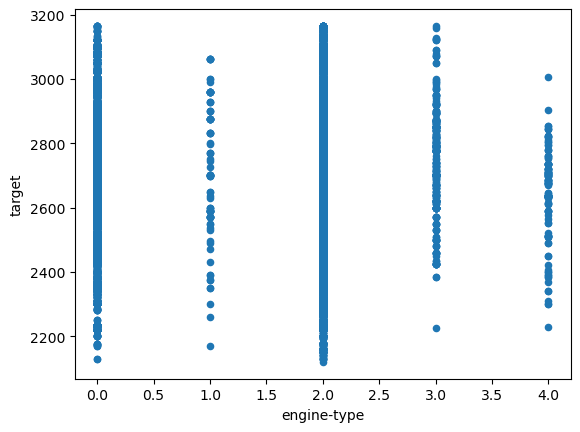

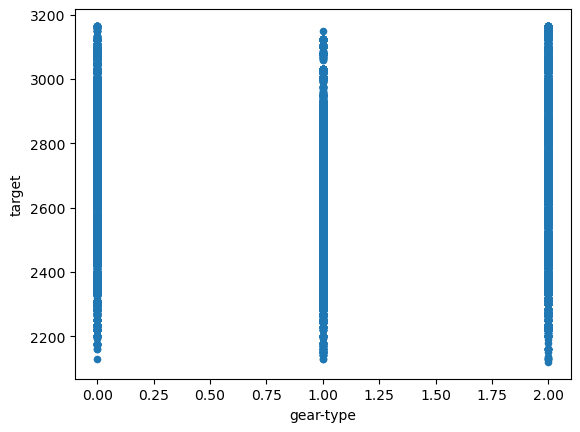

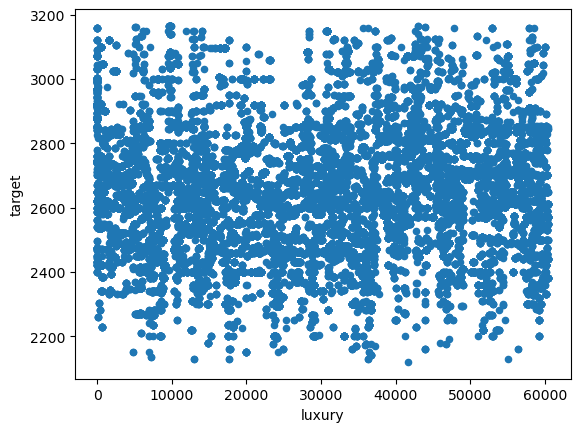

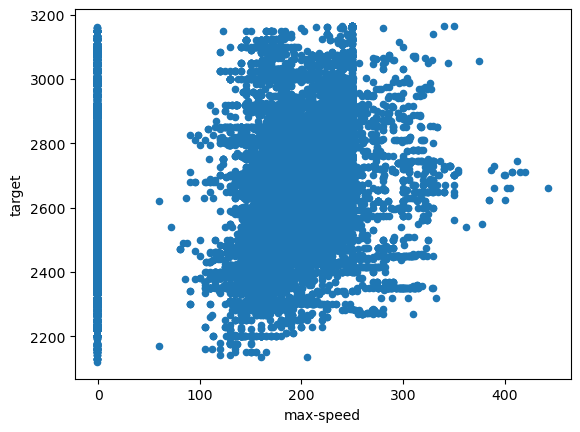

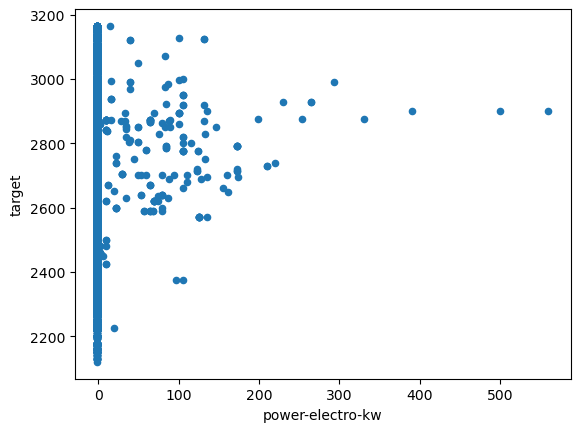

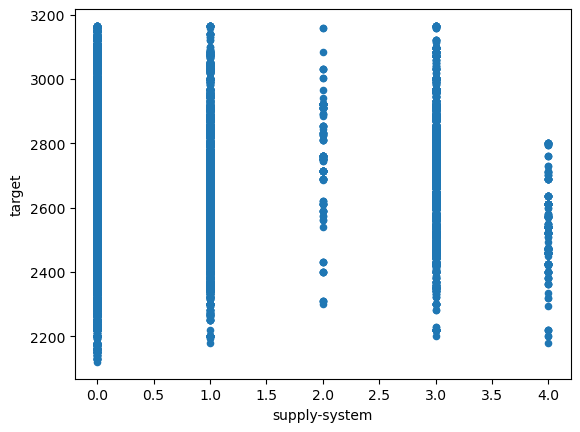

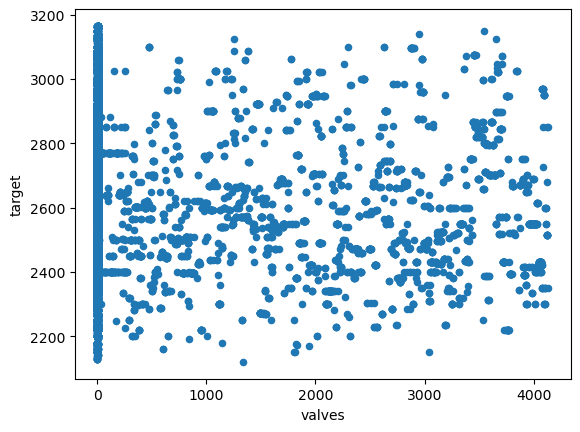

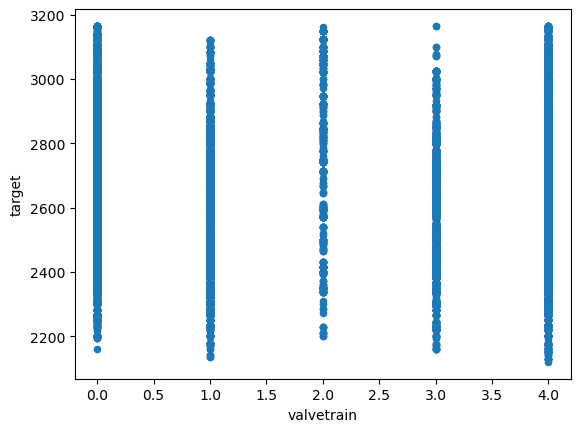

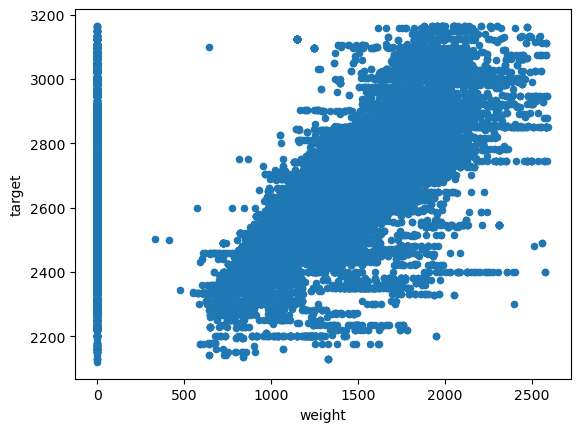

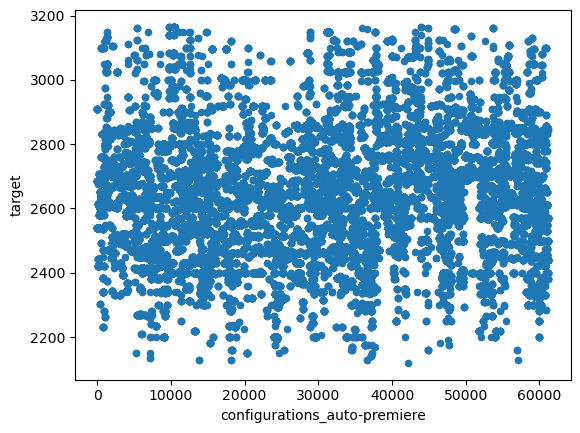

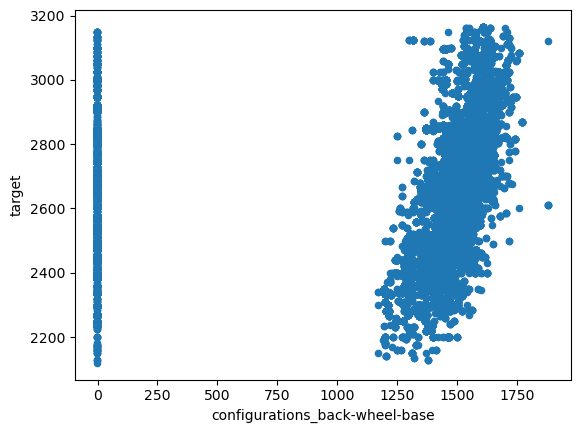

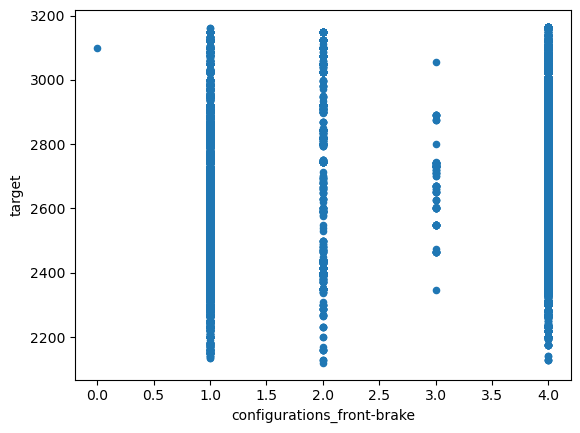

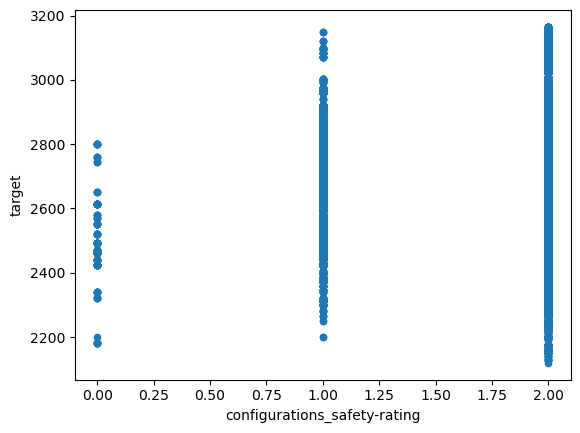

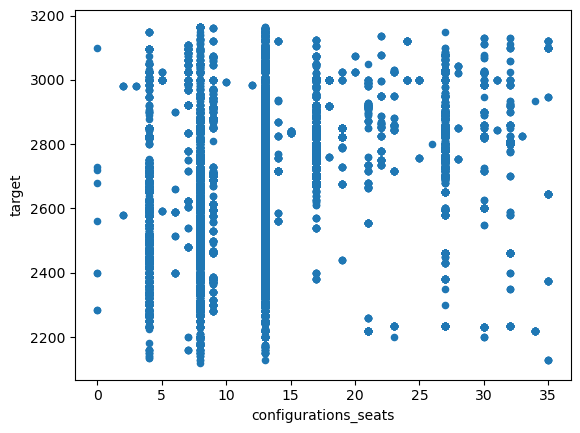

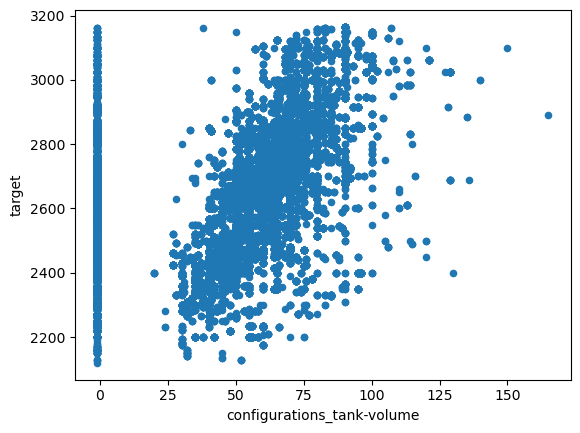

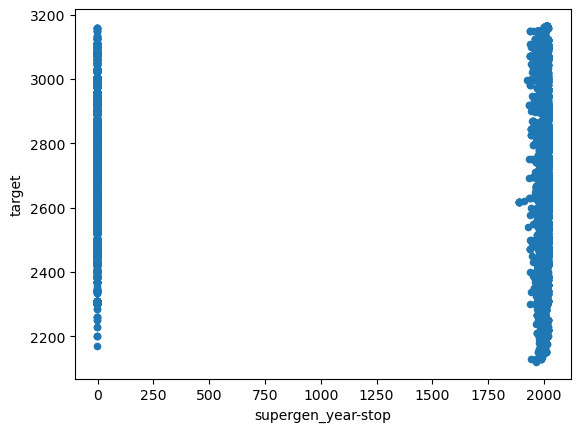

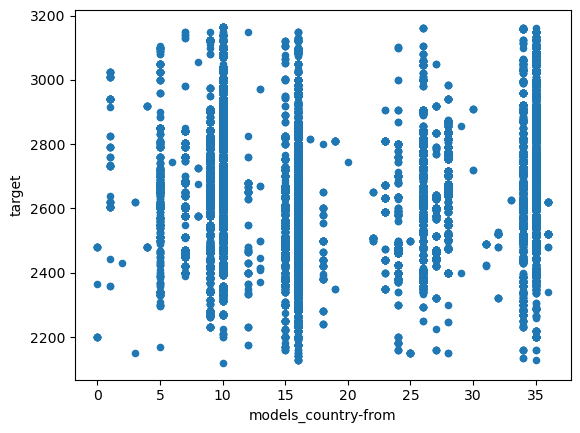

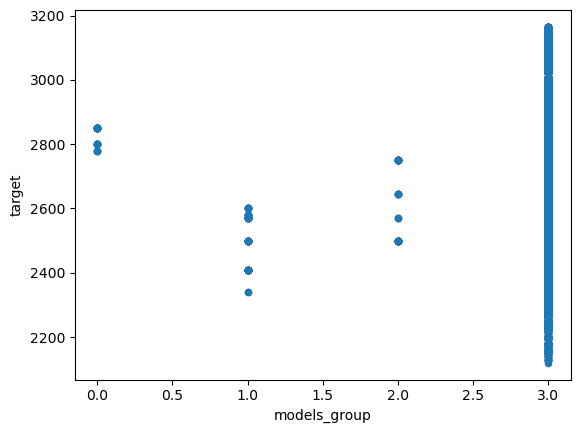

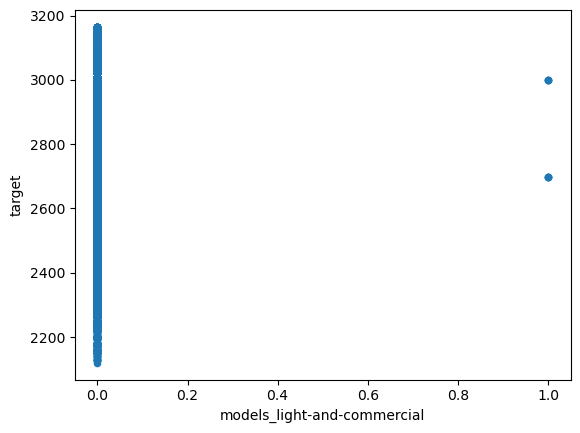

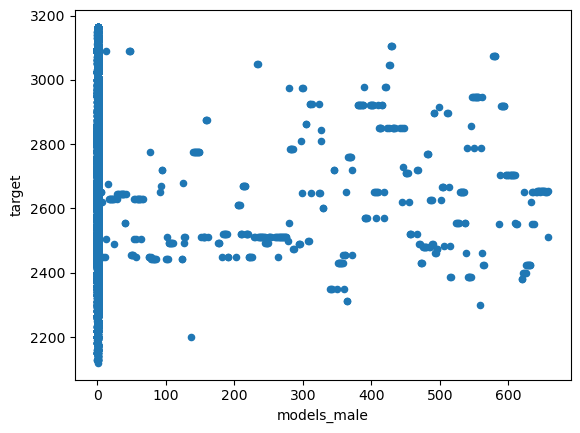

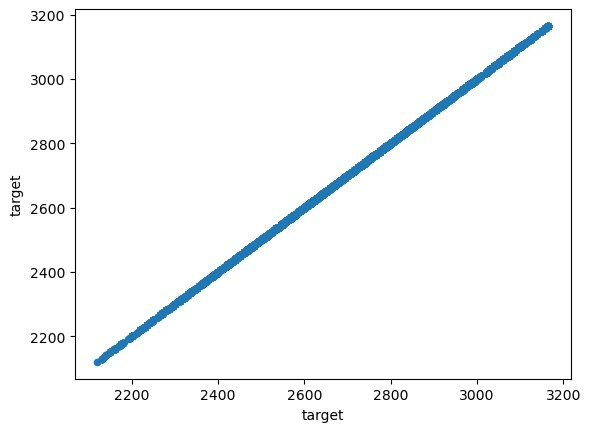

In [1322]:
for i in df.columns:
    df.plot(kind='scatter', x=i, y='target')

In [1323]:
#уберем из модели все категориальные переменные
df['back-suspension'].unique()

array([ 9,  3,  0,  8, 10,  6,  7,  1,  4,  5,  2])

In [1324]:
df.loc[df['supergen_year-stop'] == -1]

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
6,9,3,-1.0,10569,16.5,4.7,0,4,5,2019,...,4,1,13,48.0,-1.0,34,3,0,1,2670
13,17,10,-1.0,27944,-1.0,-1.0,0,6,4,2007,...,4,2,17,-1.0,-1.0,16,3,0,1,2730
33,40,8,-1.0,56104,11.0,5.2,0,4,4,2013,...,4,1,13,40.0,-1.0,35,3,0,1,2489
41,50,3,-1.0,20348,-1.0,9.0,0,4,4,2003,...,1,2,27,-1.0,-1.0,5,3,0,1,3025
77,108,3,-1.0,5992,9.5,8.1,0,4,2,2016,...,4,2,4,54.0,-1.0,10,3,0,1,2475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43217,61193,3,-1.0,18681,-1.0,-1.0,0,4,4,2008,...,4,2,13,43.0,-1.0,16,3,0,1,2650
43222,61202,3,-1.0,58536,17.3,8.2,0,4,5,2013,...,4,2,13,65.0,-1.0,16,3,0,1,2845
43230,61211,3,-1.0,47424,-1.0,10.8,3,6,4,2018,...,4,2,4,40.0,-1.0,34,3,0,1,2370
43233,61215,3,-1.0,44580,9.6,6.6,0,4,2,2018,...,4,2,8,50.0,-1.0,10,3,0,1,2505


In [1399]:
#удалим  столбцы, где слишком много аномальных -1 и перезапишем в новый датафрейм, столбцы с нужными нами столбцами
df_model = df[['charge-time', 'weight', 'engine-start', 'compression', 'consumption-mixed', 'configurations_auto-premiere', 'target', 'configurations_tank-volume', 'configurations_back-wheel-base', 'engine-stop', 'max-speed', 'supergen_year-stop', 'power-electro-kw', 'battery-capacity']]
#df_model = df[['weight', 'configurations_tank-volume', 'configurations_back-wheel-base', 'target']]

In [1400]:
#заменим -1 в весе на медиану
df_model['charge-time'] = df_model['charge-time'].replace(-1, df_model['charge-time'].mean())
df_model['weight'] = df_model['weight'].replace(-1, df_model['weight'].mean())
df_model['engine-start'] = df_model['engine-start'].replace(-1, df_model['engine-start'].mean())
df_model['engine-stop'] = df_model['engine-stop'].replace(0, df_model['engine-stop'].mean())
df_model['consumption-mixed'] = df_model['consumption-mixed'].replace(-1, df_model['consumption-mixed'].mean())
df_model['configurations_auto-premiere'] = df_model['configurations_auto-premiere'].replace(-1, df_model['configurations_auto-premiere'].mean())
df_model['compression'] = df_model['compression'].replace(-1, df_model['compression'].mean())
df_model['configurations_tank-volume'] = df_model['configurations_tank-volume'].replace(-1, df_model['configurations_tank-volume'].mean())
df_model['max-speed'] = df_model['max-speed'].replace(-1, df_model['max-speed'].median())
df_model['supergen_year-stop'] = df_model['supergen_year-stop'].replace(-1, df_model['supergen_year-stop'].median())
df_model['configurations_back-wheel-base'] = df_model['configurations_back-wheel-base'].replace(-1, df_model['configurations_back-wheel-base'].mean())
df_model['power-electro-kw'] = df_model['power-electro-kw'].replace(-1, df_model['power-electro-kw'].median())
df_model['battery-capacity'] = df_model['battery-capacity'].replace(-1, df_model['battery-capacity'].median())

/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_8054/3029729627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['charge-time'] = df_model['charge-time'].replace(-1, df_model['charge-time'].mean())
/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_8054/3029729627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['weight'] = df_model['weight'].replace(-1, df_model['weight'].mean())
/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_8054/3029729627.py:4: Sett

In [1401]:
df_model = df_model.loc[df_model['engine-stop'] > 1810]

In [1402]:
#аномальные -1 в ряде столбцов


df_model = df_model.replace(-1, np.NAN)

df_model.dropna()

,charge-time,weight,engine-start,compression,consumption-mixed,configurations_auto-premiere,target,configurations_tank-volume,configurations_back-wheel-base,engine-stop,max-speed,supergen_year-stop,power-electro-kw,battery-capacity
267,25,1900.0,2019,9.067336,1.500000,37583,2738,55.000000,1600.0,1816.169019,240.0,2002.0,220.0,13.2
499,33551,1300.0,2013,9.067336,4.328698,33574,2375,35.000000,1417.0,2016.000000,145.0,2016.0,105.0,21.0
1111,45,1480.0,2017,9.067336,4.328698,4166,2588,52.772623,1510.0,2019.000000,135.0,2019.0,68.0,41.0
1118,31,1812.0,2019,10.500000,1.800000,20104,2702,54.000000,1626.0,1816.169019,205.0,2002.0,60.0,10.7
1729,39910,1995.0,2013,10.500000,6.300000,39955,3122,90.000000,1635.0,2017.000000,228.0,2017.0,40.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39599,6014,2350.0,2014,10.500000,3.400000,6158,2895,100.000000,1669.0,2018.000000,243.0,2018.0,70.0,10.8
40667,39306,2030.0,2019,9.600000,6.800000,39326,2819,70.000000,1609.0,1816.169019,239.0,2002.0,105.0,14.1
42403,2,1660.0,2015,11.000000,2.100000,44092,2670,51.000000,1562.0,2018.000000,202.0,2018.0,65.0,7.7
43182,16,1735.0,2015,9.067336,1.700000,21289,2791,66.000000,1568.0,1816.169019,225.0,2002.0,85.0,8.7


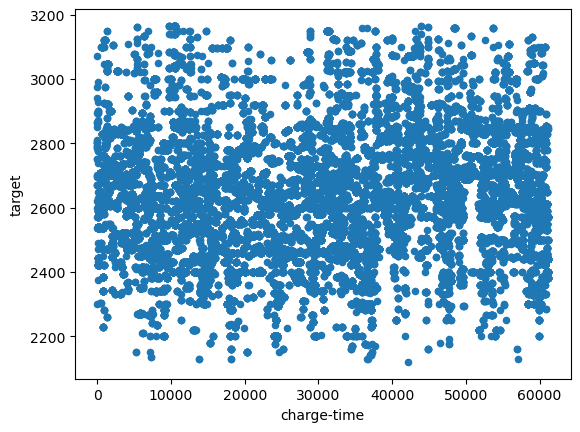

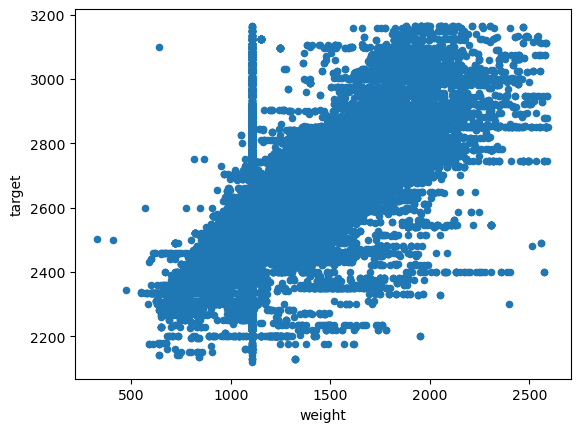

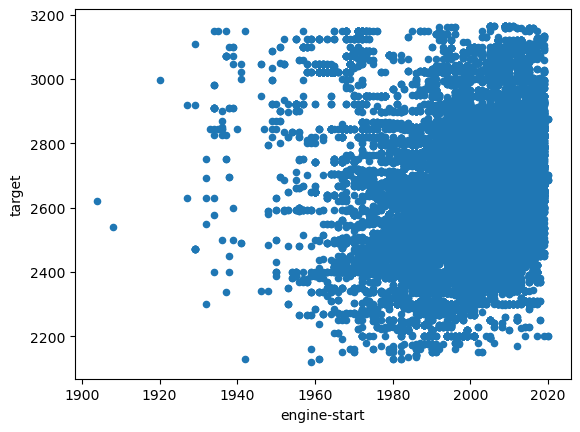

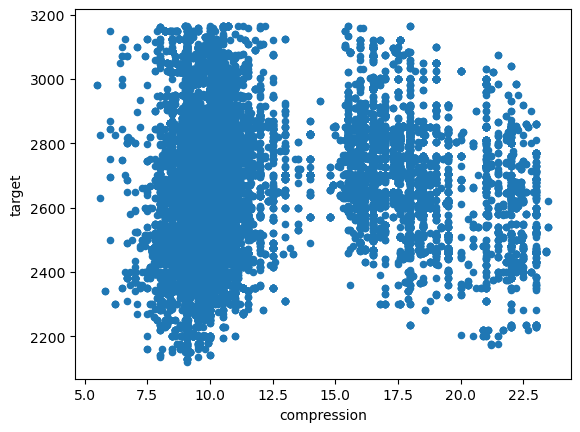

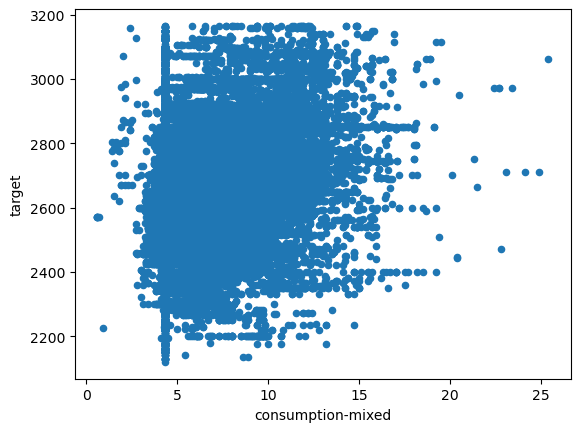

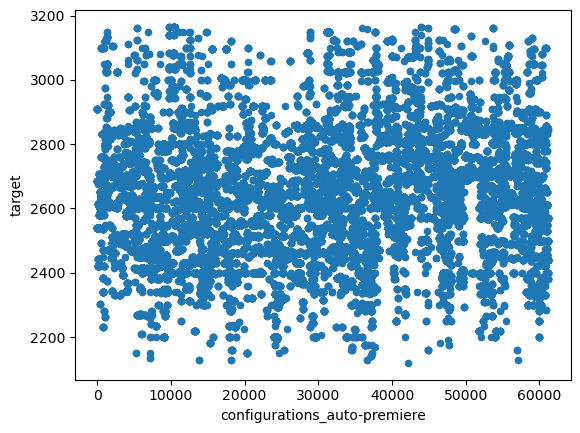

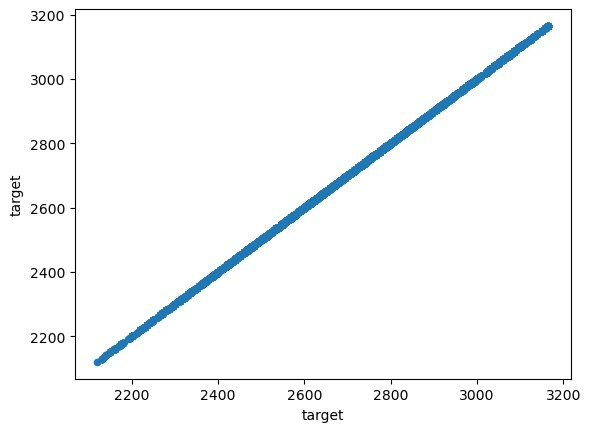

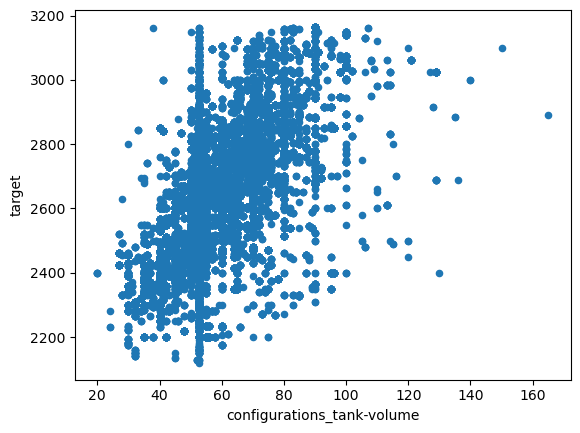

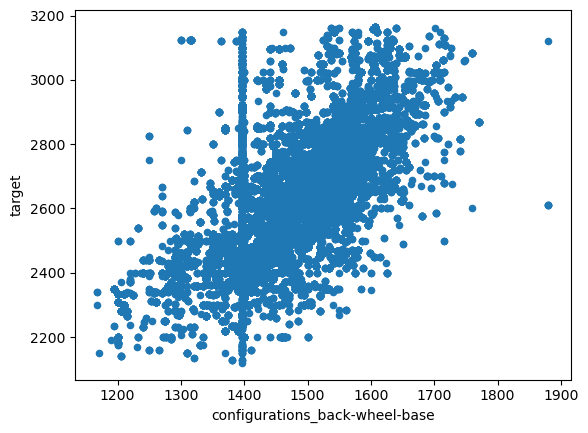

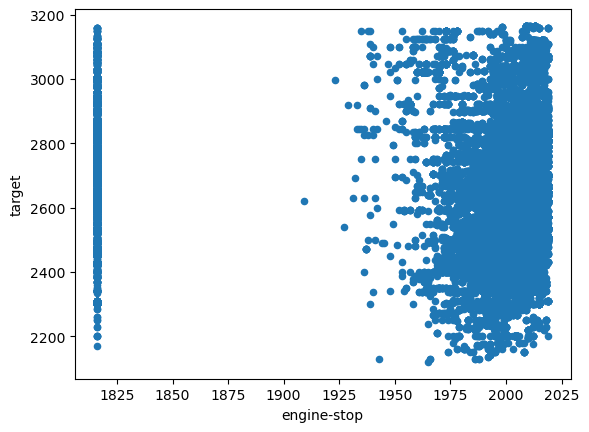

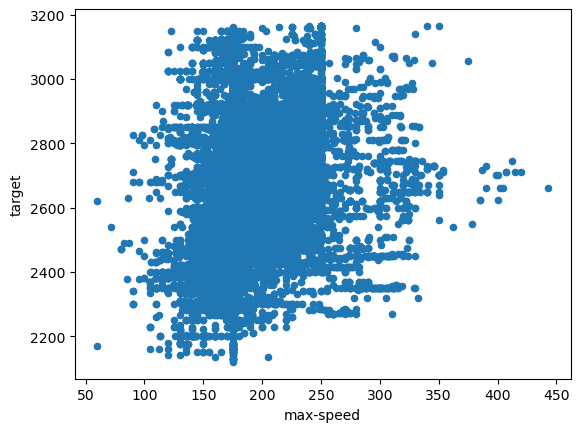

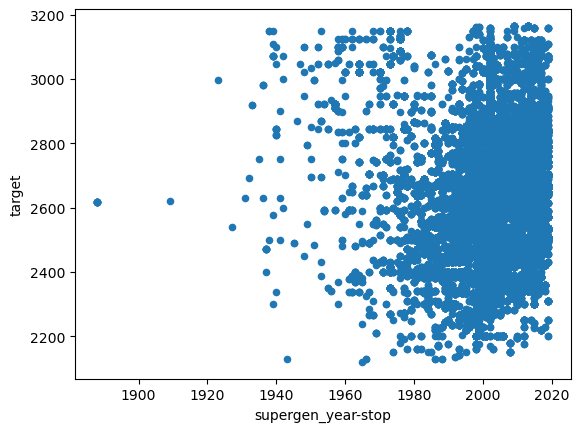

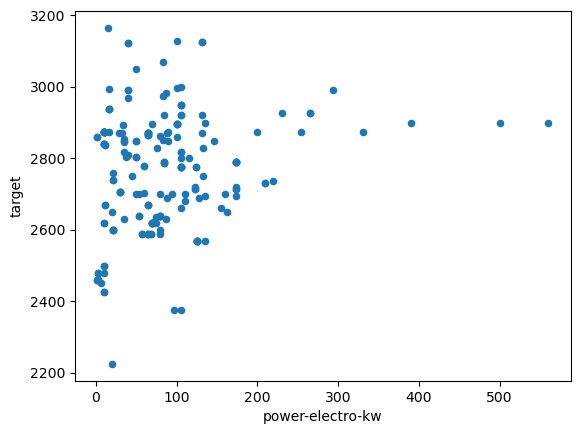

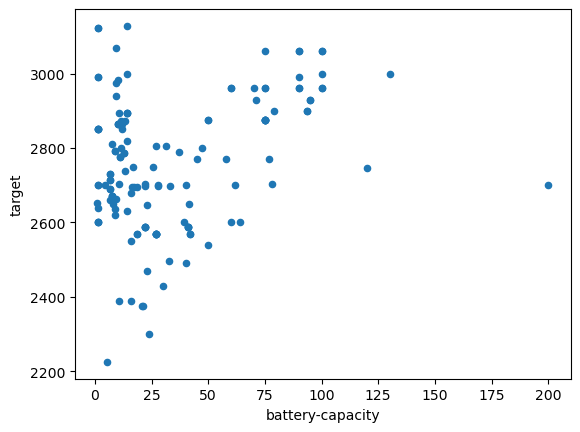

In [1403]:
for i in df_model.columns:
    df_model.plot(kind='scatter', x=i, y='target')

In [1404]:
#df_model['engine-stop'].unique()

In [1410]:
df_model['power-electro-kw'] = df_model['power-electro-kw'].replace(np.nan, df_model['power-electro-kw'].median())
df_model['battery-capacity'] = df_model['battery-capacity'].replace(np.nan, df_model['battery-capacity'].median())

## Baseline + улучшение модели

In [1411]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [1429]:
X = df_model.drop(['target'], axis=1)
#X = df.drop(["target", 'index', 'models_male'], axis=1)
#X = df[['cylinders-value', 'weight', 'configurations_tank-volume', 'configurations_seats']]
#X = df[['weight', 'configurations_tank-volume']]
#X = np.array(df['configurations_tank-volume']).reshape(-1, 1)
y = df_model[["target"]]

pf = PolynomialFeatures(degree=2)
X_polynomial = pf.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(X_polynomial, y, test_size=0.33, random_state=42)


стандартизация и нормализация

In [1430]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
#стандартизируем/нормализуем признаки-факторы
x_train_st = scaler.fit_transform(train_X)
x_test_st = scaler.transform(test_X)

In [1431]:
#обучаем модель
#reg = LinearRegression().fit(x_train_st, train_y)
reg = LinearRegression().fit(train_X, train_y)

In [1432]:
#reg.score(x_train_st, train_y)
reg.score(train_X, train_y)

0.61618883040538

In [1433]:
#mean_squared_error(reg.predict(x_train_st), train_y)
mean_squared_error(reg.predict(train_X), train_y)

13270.98817602206

In [1434]:
#scores = cross_validate(reg, x_train_st, train_y, cv=3, 
 #                       scoring=('neg_mean_squared_error'))

In [1435]:
#scores

In [1436]:
#mean_squared_error(reg.predict(x_test_st), test_y)
mean_squared_error(reg.predict(test_X), test_y)

12888.657607658271

проверим модель на тестовых данных

In [1437]:
#predictions = reg.predict(x_test_st)
predictions = reg.predict(test_X)

In [1438]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y, predictions)

0.6159116998055503

## Lasso и Ridge

In [1439]:
from sklearn.linear_model import LassoCV, RidgeCV
#model = LassoCV()
model = RidgeCV()

# обучим нашу модель
model.fit(x_train_st, train_y)
#model.fit(train_X, train_y)

# делаем прогнозы
predictions = model.predict(x_test_st)
#predictions = model.predict(test_X)

print('R2: {:.10f}'.format(r2_score(test_y, predictions)))
print('MSE: {:.2f}'.format(mean_squared_error(test_y, predictions)))

R2: 0.6120904035
MSE: 13016.89


In [1440]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=13)
tree.fit(X, y)

DecisionTreeClassifier(random_state=13)

Промежуточные заметки: 
1) видимо были исключены значимые факторы при отборе в модель только 4 наиболее коррелирующих тк качество модели снизилось (R2 снизился, а СКО увеличилась)<br>
2) использование регуляризации не дало особых результатов как на сырых так и на стандартизированных данных (R2 увеличился незначительно, а СКО незначительно уменьшилась) <br>
3) последовательное включение факторов в модель по возрастаню корреляции так же не дало особых результатов, так как наибольший R2 получился после включения в модель всех факторов кроме index <br>
4) возможно имеет смысл поработать с выбросами, но при таком объеме признаков факторов это будет тяжело (в плане союблюдения баланса удаленных данных) либо попробовать исключить выбросы только у ведущих по корреляции данных <br>
5) на качество модели очень сильно влияют пропуски в данных, которые обозначены как -1 и присутствуют в большинстве столбцов. Обрабатывать их сложно из за наличия единственного источника информации, приходится просто заменять на медиану или среднее

Выводы:

1) Повысить качество модели получилось довольно "кустарно" путем замены -1 в большинстве столбцов, поэтому ее репрезентативность снижена </br>
2) Так же в модель не были включены в качестве фиктивных переменных категориальные данные, так как это опять же заняло слишком много времени и пришлось бы делать большой объем обработок </br>
3) Около 50% вариации target объясняется маленьким объемом факторов (весом, configurations_tank-volume и configurations_back-wheel-base)
4) Введя полиномиальные переменные, получилось повысить R2 до 0,61